# 딥러닝을 시작하기에 앞서

### 파이썬 리스트 복습하기

In [ ]:
# 2개의 숫자와 하나의 문자열로 이루어진 파이썬 리스트
my_list = [10, 'hello list', 20]
print(my_list)

[10, 'hello list', 20]


In [ ]:
# 리스트의 인덱스는 0부터 시작하기 때문에 두 번째 요소를 참조하기 위해 인덱스 1을 사용
print(my_list[1])

hello list


In [ ]:
# 3개의 요소를 가진 1차원 배열을 2개 쌓은 예 -> '2x3', 2개의 행과 3개의 열
my_list_2 = [[10,20,30], [40,50,60]]

In [ ]:
# 2차원 배열의 요소를 선택할 때는 2개의 대괄호를 사용
# 첫 번째 대괄호에서는 행의 인덱스, 두 번째 대괄호에서는 열의 인덱스
print(my_list_2[1][1])

50


### 넘파이 준비하기

In [ ]:
# 1. 코랩에서 넘파이 임포트하고 버전 확인
import numpy as np
print(np.__version__)

1.19.5


### 넘파이로 배열 만들기

In [ ]:
# 1. array() 함수로 2차원 배열 만들기
my_arr = np.array([[10,20,30], [40,50,60]])
print(my_arr)

[[10 20 30]
 [40 50 60]]


In [ ]:
# 2. type() 함수로 넘파이 배열인지 확인하기
type(my_arr)

numpy.ndarray

In [ ]:
# 3. 넘파이 배열에서 요소 선택하기
my_arr[0][2]

30

In [ ]:
# 4. 넘파이 내장 함수 사용하기
np.sum(my_arr)

210

### 맷플롯립으로 그래프 그리기

In [ ]:
import matplotlib.pyplot as plt

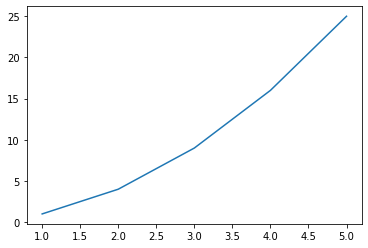

In [ ]:
# 1. 선 그래프 그리기
plt.plot([1,2,3,4,5], [1,4,9,16,25])
plt.show()

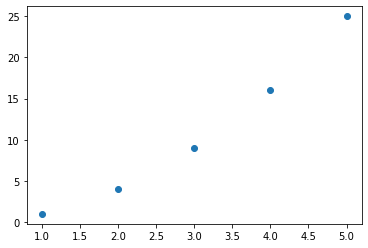

In [ ]:
# 2. 산점도 그리기
plt.scatter([1,2,3,4,5], [1,4,9,16,25])
plt.show()

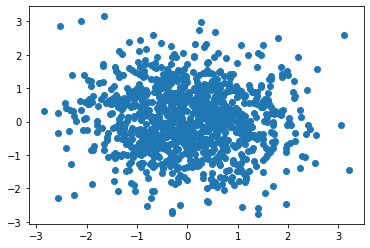

In [ ]:
# 3. 넘파이 배열로 산점도 그리기
x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x, y)
plt.show()

# I. 머신러닝의 기초 _ 수치 예측

### i) 선형회귀

#### 문제 해결을 위해 당뇨병 환자의 데이터 준비하기

##### 사이킷런에서 당뇨병 환자 데이터 가져오기

In [ ]:
# 1. load_diabetes() 함수로 당뇨병 데이터 준비하기
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [ ]:
# 2. 입력과 타깃 데이터의 크기 확인하기
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [ ]:
# 3. 입력 데이터 자세히 보기
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [ ]:
# 4. 타깃 데이터 자세히 보기
diabetes.target[:3]

array([151.,  75., 141.])

#### 당뇨병 환자 데이터 시각화하기 

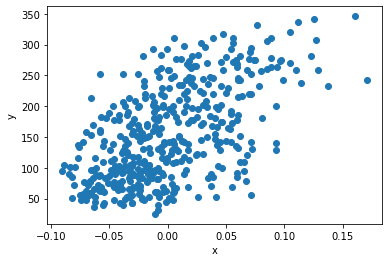

In [ ]:
# 1. 맷플롯립의 scatter() 함수로 산점도 그리기
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# 2. 훈련 데이터 준비하기
x = diabetes.data[:, 2]
y = diabetes.target

### ii) 경사 하강법

#### 예측값으로 올바른 모델 찾기

##### 훈련 데이터에 맞는 w와 b 찾아보기

1. w와 b 초기화하기

In [ ]:
w = 1.0
b = 1.0

2. 훈련 데이터의 첫 번째 샘플 데이터로 $\hat{y}$ 얻기

In [ ]:
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186886


3. 타깃과 예측 데이터 비교하기

In [ ]:
print(y[0])

151.0


4. w 값 조절해 예측값 바꾸기

In [ ]:
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


5. w 값 조정한 후 예측값 증가 정도 확인하기

In [ ]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688734


#### 변화율로 가중치 업데이트하기

In [ ]:
w_new = w + w_rate
print(w_new)

1.0616962065186888


#### 변화율로 절편 업데이트하기

In [ ]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186887


In [ ]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


$$b_ _rate = \frac{y_hat_inc - y_hat}{}$$

In [ ]:
b_new = b + 1
print(b_new)

2.0


#### 오차 역전파로 가중치와 절편을 더 적절하게 업데이트

가중치와 절편을 더욱 적절하게 업데이트하는 방법

1. 오차와 변화율을 곱하여 가중치 업데이트하기

In [ ]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


2. 두 번째 샘플 x[1]을 사용할 때

In [ ]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616381767 75.52764127612664


3. 전체 샘플을 반복하기

In [ ]:
for x_i, y_i in zip(x, y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err
print(w, b)

587.8654539985689 99.40935564531424


ㄴ> zip() 함수는 여러 개의 배열에서 동시에 요소를 하나씩 꺼내줍니다.   
  여기에서는 입력 x와 타깃 y 배열에서 요소를 하나씩 꺼내어 err를 계산하고 w와 b를 업데이트

4. 과정 3을 통해 얻어낸 모델 시각화

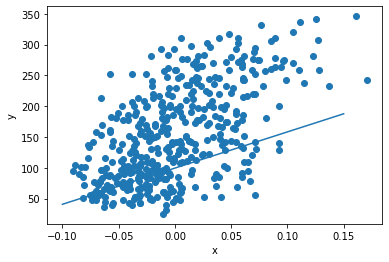

In [ ]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

5. 여러 에포크를 반복하기

In [ ]:
for i in range(1, 100):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

913.5973364345905 123.39414383177204


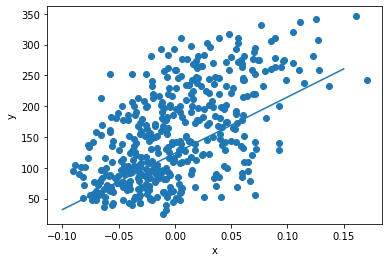

In [ ]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

6. 모델로 예측하기

In [ ]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643899983


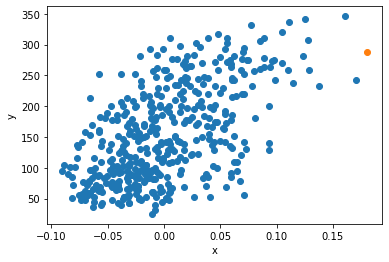

In [ ]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### iii) 손실 함수와 경사 하강법의 관계

#### 손실 함수

$$SE = (y-\hat{y})^2$$

가중치에 대하여 제곱 오차 미분하기

In [ ]:
y_hat = x_i * w + b
err = y_i - y_hat
w_rate = x_i
w = w + w_rate * err

절편에 대하여 제곱 오차 미분하기

In [ ]:
err = y_i - y_hat
b = b + i * err

### iv) 선형 회귀를 위한 뉴런

#### Neuron 클래스 만들기

In [ ]:
class Neuron:
  def __init__(self):
  # 초기화 작업을 수행합니다. 
  ...

  # 필요한 메서드를 추가합니다.
  ...

1.   __ init __() 메서드 작성하기

In [ ]:
def __init__(self):
  self.w = 1.0
  self.b = 1.0

2. 정방향 계산 만들기

In [ ]:
def forpass(self, x):
  y_hat = x * self.w + self.b     # 직선 방정식을 계산합니다.
  return y_hat

3. 역방향 계산 만들기

In [ ]:
def backprop(self, x, err):
  w_grad = x * err              # 가중치에 대한 gradient를 계산합니다.
  b_grad = 1 * err              # 절편에 대한 gradient를 계산합니다.
  return w_grad, b_grad

4. 